## Gradient Descent

 * 오차가 가장 작은 지점을 찾아가는 방법이다.
 * 미분을 이용하여 한 점에서의 순간 기울기를 구한다.
 * 순간 기울기가 0인, 미분 값이 0인 지점을 찾는 것이다.

## 즉, 경사 하강법은 반복적으로 기울기 a를 변화시켜서 m의 값을 찾아내는 방법을 말한다.

### 기울기와 오차 사이의 그래프

<img src='img/gradient_decent01.png'>

#### 오차가 가장 작을 때는 x가 그래프의 가장 아래쪽의 볼록한 부분에 이르렀을 때.
#### 즉, 기울기 a가 m위치에 있을 때이다. 
#### m의 값을 구하려면 임의의 한점(a1)을 찍고, 이 점을 m에 가까운 쪽으로 점점 이동(a1 -> a2 -> a3)로 이동시키는 과정 필요

## GradientDescent
 * 오차를 비교하여 가장 작은 방향으로 이동시키는 방법. 
 * 미분 기울기를 이용하는 방법이다. 

## 실습을 통해 알아보기

In [1]:
import tensorflow as tf

C:\Users\WITHJS\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# x, y의 데이터 값
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x_data = [x1[0] for x1 in data]
y_data = [x2[1] for x2 in data]

### 기울기 a와 y절편 b의 값을 임의로 정한다
 * 범위 0~10, y절편 0~100사이의 값

In [9]:
a = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64, seed = 0))  # 0~10 사이의 임의의 값 1개를 만들기
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype = tf.float64, seed = 0)) # 0~100 사이의 임의의 값 1개를 만들기 

In [4]:
# y에 대한 일차 방정식 ax+b의 식을 세운다.
y = a * x_data + b

In [5]:
### tf RMSE 함수
rmse = tf.sqrt(tf.reduce_mean(tf.square( y - y_data )))

In [6]:
# 학습률 값
learning_rate = 0.1

In [7]:
# RMSE 값을 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

### 텐서플로를 이용한 학습

In [8]:
# 텐서플로를 이용한 학습
with tf.Session() as sess:
    # 변수 초기화
    sess.run(tf.global_variables_initializer())
    # 2001번 실행(0번 째를 포함하므로)
    for step in range(2001):
        sess.run(gradient_decent)
        # 100번마다 결과 출력
        if step % 100 == 0:
            print("Epoch: %.f, RMSE = %.04f, 기울기 a = %.4f, y 절편 b = %.4f" % (step,sess.run(rmse),sess.run(a),sess.run(b)))


Epoch: 0, RMSE = 30.2139, 기울기 a = 7.5235, y 절편 b = 80.5984
Epoch: 100, RMSE = 2.8860, 기울기 a = 2.2299, y 절편 b = 79.4181
Epoch: 200, RMSE = 2.8826, 기울기 a = 2.2601, y 절편 b = 79.2379
Epoch: 300, RMSE = 2.8815, 기울기 a = 2.2773, y 절편 b = 79.1353
Epoch: 400, RMSE = 2.8811, 기울기 a = 2.2871, y 절편 b = 79.0770
Epoch: 500, RMSE = 2.8810, 기울기 a = 2.2927, y 절편 b = 79.0438
Epoch: 600, RMSE = 2.8810, 기울기 a = 2.2958, y 절편 b = 79.0249
Epoch: 700, RMSE = 2.8810, 기울기 a = 2.2976, y 절편 b = 79.0142
Epoch: 800, RMSE = 2.8810, 기울기 a = 2.2987, y 절편 b = 79.0081
Epoch: 900, RMSE = 2.8810, 기울기 a = 2.2992, y 절편 b = 79.0046
Epoch: 1000, RMSE = 2.8810, 기울기 a = 2.2996, y 절편 b = 79.0026
Epoch: 1100, RMSE = 2.8810, 기울기 a = 2.2998, y 절편 b = 79.0015
Epoch: 1200, RMSE = 2.8810, 기울기 a = 2.2999, y 절편 b = 79.0008
Epoch: 1300, RMSE = 2.8810, 기울기 a = 2.2999, y 절편 b = 79.0005
Epoch: 1400, RMSE = 2.8810, 기울기 a = 2.3000, y 절편 b = 79.0003
Epoch: 1500, RMSE = 2.8810, 기울기 a = 2.3000, y 절편 b = 79.0002
Epoch: 1600, RMSE = 2.8810, 기울기 a =

 * 100번마다의 결과를 찍기
 * 평균 제곱근 오차(RMSE)의 변화의 기울기 a가 2.3에 수렴한다.
 * y절편 b가 79에 수렴한다.

### 우리는 예측 직선을 그려 결과값을 예측해 보았지만, 약간의 오차가 있다.
### 그렇다면 공부한 시간 외에 다른 요소가 성적에 영향을 끼치고 있기 때문일 수 있다.

 * 정보의 예측을 위해 추가 정보를 입력한다.
 * 새로운 예측 값을 구하려면 변수의 개수를 늘려 '다중 선형 회귀'를 만들어 주어야 한다.

### y = a1*x1 + a2x2 + b

### 다중선형 회귀 구현하기

In [14]:
hour = [2,4,6,8]     # 공부 시간 
classCnt = [0,4,2,3]   # 과외 횟수
score = [81,93,91, 97]  # 점수

In [15]:
a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
a2 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0))

In [16]:
# 새로운 방정식
# y = a1 * x1 + a2 * x2+ b
y = a1 * hour + a2 * classCnt + b

In [17]:
# 텐서플로 RMSE 함수
rmse = tf.sqrt(tf.reduce_mean(tf.square( y - y_data )))

In [18]:
# 학습률 값
learning_rate = 0.1

# RMSE 값을 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(gradient_decent)
        if step % 100 == 0:
            print("Epoch: %.f, RMSE = %.04f, 기울기 a1 = %.4f, 기울기 a2 = %.4f, y절편 b = %.4f" % (step,sess.run(rmse),sess.run(a1),sess.run(a2),sess.run(b)))

Epoch: 0, RMSE = 49.1842, 기울기 a1 = 7.5270, 기울기 a2 = 7.8160, y절편 b = 80.5980
Epoch: 100, RMSE = 1.8368, 기울기 a1 = 1.1306, 기울기 a2 = 2.1316, y절편 b = 78.5119
Epoch: 200, RMSE = 1.8370, 기울기 a1 = 1.1879, 기울기 a2 = 2.1487, y절편 b = 78.1057
Epoch: 300, RMSE = 1.8370, 기울기 a1 = 1.2122, 기울기 a2 = 2.1571, y절편 b = 77.9352
Epoch: 400, RMSE = 1.8370, 기울기 a1 = 1.2226, 기울기 a2 = 2.1607, y절편 b = 77.8636
Epoch: 500, RMSE = 1.8370, 기울기 a1 = 1.2269, 기울기 a2 = 2.1622, y절편 b = 77.8335
Epoch: 600, RMSE = 1.8370, 기울기 a1 = 1.2288, 기울기 a2 = 2.1628, y절편 b = 77.8208
Epoch: 700, RMSE = 1.8370, 기울기 a1 = 1.2295, 기울기 a2 = 2.1631, y절편 b = 77.8155
Epoch: 800, RMSE = 1.8370, 기울기 a1 = 1.2299, 기울기 a2 = 2.1632, y절편 b = 77.8133
Epoch: 900, RMSE = 1.8370, 기울기 a1 = 1.2300, 기울기 a2 = 2.1632, y절편 b = 77.8124
Epoch: 1000, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y절편 b = 77.8120
Epoch: 1100, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y절편 b = 77.8118
Epoch: 1200, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y절편 b = 77.81

## 로지스틱 회귀를 그래프로 표시해봄.

In [21]:
%matplotlib inline

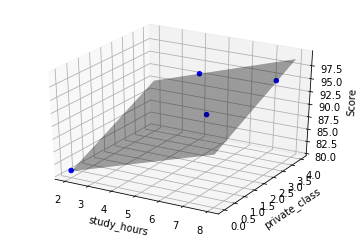

In [22]:
import numpy as np
import statsmodels.api as statm
import statsmodels.formula.api as statfa
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
X = [i[0:2] for i in data]
Y = [i[2] for i in data]

X_1=statm.add_constant(X)
results=statm.OLS(Y,X_1).fit()

hour_class=pd.DataFrame(X,columns=['study_hours','private_class'])
hour_class['Score']=pd.Series(Y)

model = statfa.ols(formula='Score ~ study_hours + private_class', data=hour_class)

results_formula = model.fit()

a, b = np.meshgrid(np.linspace(hour_class.study_hours.min(),hour_class.study_hours.max(),100),
                   np.linspace(hour_class.private_class.min(),hour_class.private_class.max(),100))

X_ax = pd.DataFrame({'study_hours': a.ravel(), 'private_class': b.ravel()})
fittedY=results_formula.predict(exog=X_ax)
fig = plt.figure()

graph = fig.add_subplot(111, projection='3d')

graph.scatter(hour_class['study_hours'],hour_class['private_class'],hour_class['Score'],
              c='blue',marker='o', alpha=1)
graph.plot_surface(a,b,fittedY.values.reshape(a.shape),
                   rstride=1, cstride=1, color='none', alpha=0.4)
graph.set_xlabel('study_hours')
graph.set_ylabel('private_class')
graph.set_zlabel('Score')

plt.show()